<a href="https://colab.research.google.com/github/AndrewCrossman/PHYS646/blob/main/Phys646_Speed_of_Light.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pylab as plt
from scipy.stats import linregress
from scipy import optimize
from google.colab import files
%pylab inline
#plt.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
dd = .0025
# because the measured time is t2-t1 where both t1 and t2 have an uncertainty of .05ns
# the total uncertianty is (t2^2+t1^2)^(1/2)
dt = (.05**2+.05**2)**(1/2)

In [3]:
x = [1.02, 1.205, 1.35, 1.53, 1.705, 1.89, 2.08, 2.37, 2.585, 2.86]
t = [x/2 for x in [6.943, 7.742, 9.129, 10.006, 11.115, 12.494, 13.55, 16.03, 16.922, 18.642]]

In [4]:
terr = [dt for x in range(len(t))]

In [9]:
c = [x[i]/t[i] for i in range(len(x))]
cmean = np.mean(c)
sum = 0
for i in c:
  sum = sum + (i-cmean)**2
std = np.sqrt(1/9*sum)
error = std/np.sqrt(10)
cmean, error

(0.30310854179160823, 0.0018804954831554263)

In [12]:
X = np.c_[np.ones(len(x)), x]
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(t)
theta_best

array([0.06819882, 3.25918321])

In [13]:
A = np.vander(x, 2) #alternative to np.c_, same difference, but note the order of the columns
ATA = np.dot(A.T, A / np.power(terr,2)[:, None])
cov = np.linalg.inv(ATA) #covariance will give us the errors
w = np.linalg.solve(ATA, np.dot(A.T, t / np.power(terr,2)))

In [15]:
print("Least-squares estimates:")
print("m = {0:.9f} ± {1:.8f}".format(w[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(w[1], np.sqrt(cov[1, 1])))

Least-squares estimates:
m = 3.259183209 ± 0.03856051
b = 0.068 ± 0.075


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

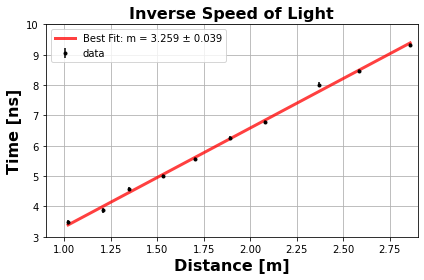

In [47]:
fig, ax = plt.subplots(figsize=(6,4))
ax.errorbar(x,t,yerr=terr, fmt=".k", label="data")
ax.plot(x, np.multiply(w[0],x)+w[1], "r", 
         alpha=0.75, lw=3, label="Best Fit: m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
ax.set_title(r'Inverse Speed of Light', fontsize=16, fontweight='bold')
ax.set_xlabel('Distance [m]', fontsize=16, fontweight='bold')
ax.set_ylabel(r'Time [ns]', fontsize=16, fontweight='bold')
ax.set_xlim(.9,2.9)
ax.set_ylim(3,10)
ax.legend()
ax.grid()
plt.tight_layout()
plt.savefig("1.png")
files.download('1.png')